In [34]:
import os
import pickle
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support

In [35]:
dataframe = pd.read_csv('D:\\FakeNews\\archive\\fake_or_real_news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [36]:
x = dataframe['text']
y = dataframe['label']

In [37]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [38]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [39]:
Counter(dataframe['label']) 

Counter({'FAKE': 3164, 'REAL': 3171})

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
                              ...                        
4931    Twenty-two of the 37 corporations nominated fo...
3264    As pieces of luggage, human remains, wreckage ...
1653    0 Add Comment \nIN THE immediate aftermath of ...
2607    Palestine Palestinians check the flat of Amjad...
2732    For the second week in a row, there was a temp...
Name: text, Length: 5068, dtype: object

In [8]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

Text(0.5, 1.0, 'Fake news')

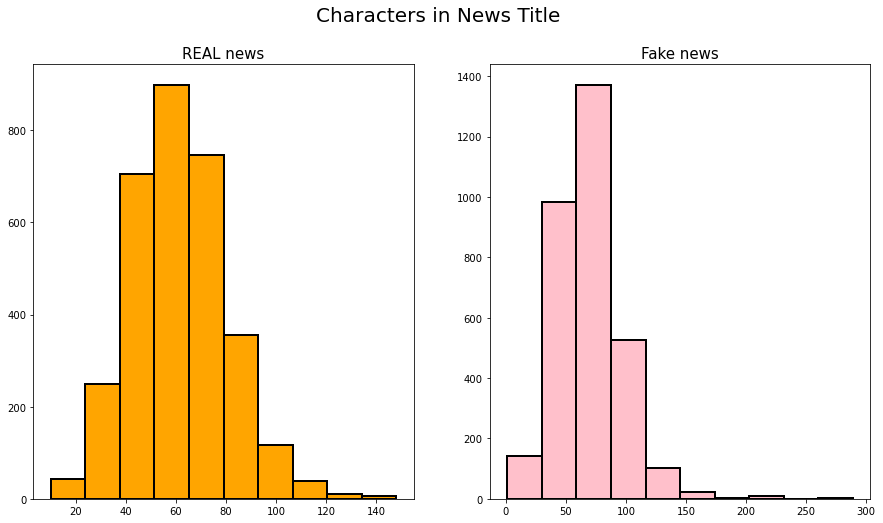

In [39]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=dataframe[dataframe['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=dataframe[dataframe['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,color='pink',linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

Text(0.5, 1.0, 'Fake news')

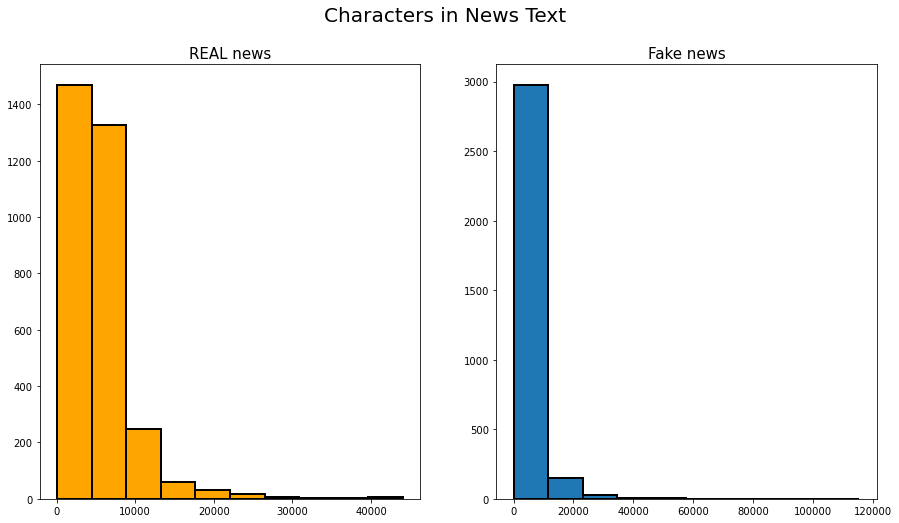

In [42]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Text',fontsize=20)
news_len=dataframe[dataframe['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=dataframe[dataframe['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [5]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.8)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [10]:
modelPACL = PassiveAggressiveClassifier(max_iter=50)
modelPACL.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
modelLR=LogisticRegression()
modelLR.fit(tfid_x_train,y_train)

LogisticRegression()

In [13]:
modelRF=RandomForestClassifier()
modelRF.fit(tfid_x_train,y_train)

RandomForestClassifier()

In [7]:
y_predLR = modelLR.predict(tfid_x_test)
y_predPACL = modelPACL.predict(tfid_x_test)
y_predRF = modelRF.predict(tfid_x_test)

In [8]:
accuracyLR = accuracy_score(y_test,y_predLR)
accuracyPACL = accuracy_score(y_test,y_predPACL)
accuracyRF = accuracy_score(y_test,y_predRF)

In [9]:
labels={'PassiveAggressiveClassifier':accuracyPACL,'RandomForestClassifier':accuracyRF,'LogisticRegression':accuracyLR}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

PassiveAggressiveClassifier : 0.9368587213891081
RandomForestClassifier : 0.904498816101026
LogisticRegression : 0.9155485398579322


In [10]:
scorePACL = accuracy_score(y_test,y_predPACL)
print(f'Accuracy of Passive Aggressive Classifier: {round(scorePACL*100,2)}%')

scoreLR = accuracy_score(y_test,y_predLR)
print(f'Accuracy of Logistic Regression: {round(scoreLR*100,2)}%')

scoreRF = accuracy_score(y_test,y_predRF)
print(f'Accuracy of Random Forest Classifier: {round(scoreRF*100,2)}%')

Accuracy of Passive Aggressive Classifier: 93.69%
Accuracy of Logistic Regression: 91.55%
Accuracy of Random Forest Classifier: 90.45%


In [30]:
print("F1 score Logistic Regression: ")
precision_recall_fscore_support(y_test, y_predLR, average='weighted')

F1 score Logistic Regression: 


(0.9159139677265499, 0.9155485398579322, 0.9155664311242119, None)

In [32]:
print("F1 score Passive Aggressive Classifier: ")
precision_recall_fscore_support(y_test, y_predPACL, average='weighted')

F1 score Passive Aggressive Classifier: 


(0.9369051844936325, 0.9368587213891081, 0.9368445435242649, None)

In [33]:
print("F1 score Random Forest Classifier:  ")
precision_recall_fscore_support(y_test, y_predRF, average='weighted')

F1 score Random Forest Classifier:  


(0.9045409151733013, 0.904498816101026, 0.9044741540775675, None)

In [29]:
print("Confusion matrix of Passive Aggressive Classifier : ")
cfPACL = confusion_matrix(y_test,y_predPACL, labels=['FAKE','REAL'])
print(cfPACL)


Confusion matrix of Passive Aggressive Classifier : 
[[571  44]
 [ 36 616]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

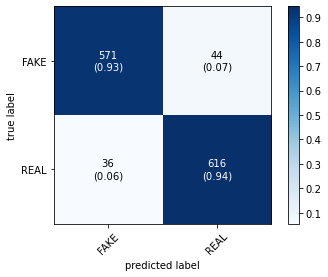

In [21]:
plot_confusion_matrix(conf_mat=cfPACL,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [22]:
print("Confusion matrix of Logistic Regression : ")
cfLR = confusion_matrix(y_test,y_predLR, labels=['FAKE','REAL'])
print(cfLR)

Confusion matrix of Logistic Regression : 
[[570  45]
 [ 62 590]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

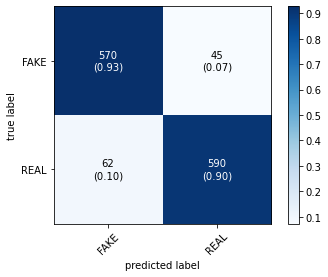

In [23]:
plot_confusion_matrix(conf_mat=cfLR,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [24]:
print("Confusion matrix of Random Forest Classifier : ")
cfRF = confusion_matrix(y_test,y_predRF, labels=['FAKE','REAL'])
print(cfRF)

Confusion matrix of Random Forest Classifier : 
[[550  65]
 [ 56 596]]


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

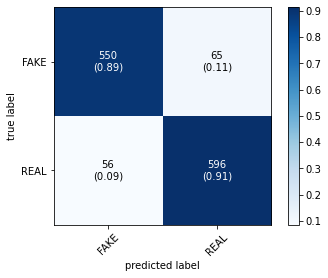

In [25]:
plot_confusion_matrix(conf_mat=cfRF,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [26]:
pickle.dump(modelRF,open('D:\\FakeNews\\archive\\modelRF.pkl', 'wb'))
pickle.dump(modelLR,open('D:\\FakeNews\\archive\\modelLR.pkl', 'wb'))
pickle.dump(modelPACL,open('D:\\FakeNews\\archive\\modelPACL.pkl', 'wb'))


In [6]:
# load the model from disk
loaded_modelRF = pickle.load(open('D:\\FakeNews\\archive\\modelRF.pkl', 'rb'))
loaded_modelLR = pickle.load(open('D:\\FakeNews\\archive\\modelLR.pkl', 'rb'))
loaded_modelPACL = pickle.load(open('D:\\FakeNews\\archive\\modelPACL.pkl', 'rb'))

In [28]:
def fake_news_detRF(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_modelRF.predict(vectorized_input_data)
    print(prediction)

In [30]:
fake_news_detRF("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [31]:
def fake_news_detLR(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_modelLR.predict(vectorized_input_data)
    print(prediction)

In [32]:
fake_news_detLR("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [33]:
def fake_news_detPACL(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_modelPACL.predict(vectorized_input_data)
    print(prediction)

In [35]:
fake_news_detPACL('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']


<BarContainer object of 3 artists>

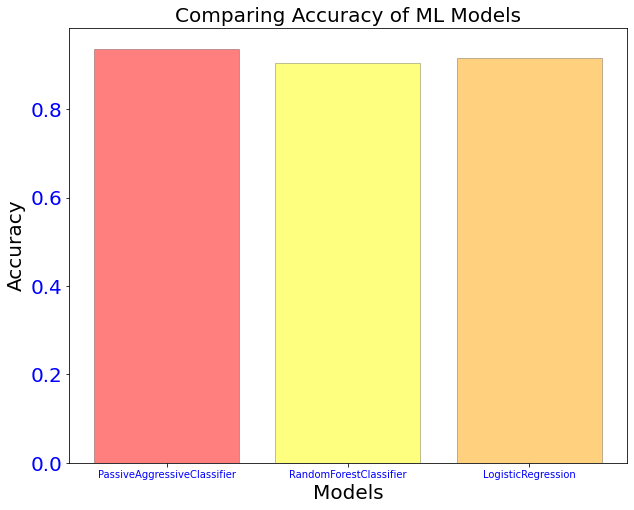

In [51]:
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange',]
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=0.5,alpha=0.5)